In [29]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np

base_dir = "E:/Hobbies/programming/data/"

In [30]:
grave_data = pd.read_csv(base_dir + "graves.csv").set_index("Grave")
stats_per_grave = pd.read_csv(base_dir + "stats_per_grave.csv").set_index("grave", drop=True)
last_time = stats_per_grave[stats_per_grave['time'] == stats_per_grave['time'].max()]
print(last_time)


                                     Unnamed: 0    mean    median   maxx  \
grave                                                                      
T01    zdif_220829_r_230119_T01_datasets_05.csv  0.1020  0.106783  0.238   
T02    zdif_220829_r_230119_T02_datasets_05.csv  0.0675  0.077090  0.269   
T03    zdif_220829_r_230119_T03_datasets_05.csv  0.0590  0.058233  0.153   
T04    zdif_220829_r_230119_T04_datasets_05.csv  0.0750  0.077009  0.197   
T05    zdif_220829_r_230119_T05_datasets_05.csv  0.1160  0.116920  0.258   
T06    zdif_220829_r_230119_T06_datasets_05.csv  0.0215  0.024585  0.111   
T07    zdif_220829_r_230119_T07_datasets_05.csv  0.0740  0.074085  0.196   
T08    zdif_220829_r_230119_T08_datasets_05.csv  0.1110  0.108878  0.201   
T09    zdif_220829_r_230119_T09_datasets_05.csv  0.0990  0.081724  0.159   
T10    zdif_220829_r_230119_T10_datasets_05.csv  0.0760  0.068058  0.153   
T11    zdif_220829_r_230119_T11_datasets_05.csv  0.1340  0.125870  0.255   
T12    zdif_

In [69]:
combined = pd.concat([grave_data, last_time], axis=1)
combined = combined[combined['Depth (cm)'] < 110]

combined['mean elevation change (cm)'] = combined['mean'] * 100

#grave = combined['KG'] > 0
#control = ~grave

#grave = combined[(combined['KG'] > 0) & (combined['KG'] < 90)]
grave = combined['KG'] > 0 & combined['KG'] < 90

#control = ~grave
print(grave)
predicted_by_depth = combined[control].groupby('Depth (cm)')['mean elevation change (cm)'].mean() #depth_only.predict(combined[['Depth (cm)']].values)
difference = combined['mean elevation change (cm)'] - predicted_by_depth.loc[combined['Depth (cm)']].values


TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

0.00513251537924973 Explained variance


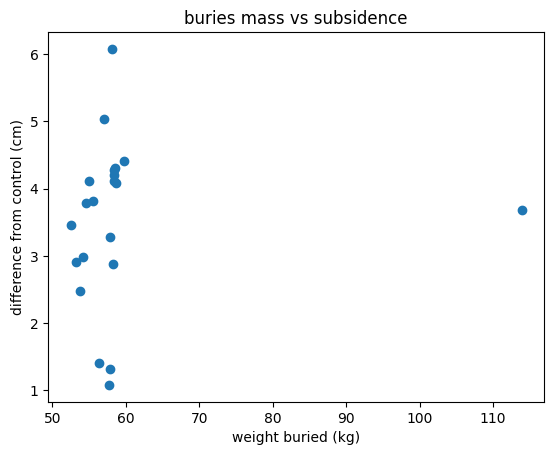

In [55]:
print(scipy.stats.linregress(combined[grave]['KG'].values, difference[grave].values).rvalue**2, "Explained variance")
plt.scatter(combined[grave]["KG"].values, difference[grave].values)
plt.xlabel("weight buried (kg)")
plt.ylabel("difference from control (cm)")
plt.title("buries mass vs subsidence")
plt.savefig("fig.png")